# PhenoCam ROI Summary Files With R

Here's a jupyter notebook demonstrating how to read in and plot an ROI (Region of Interest) summary using R.  In this case I'm using the 1-day summary file from the alligatorriver site.  The summary files are in CSV format and can be read directly from the site using a URL. 

In [6]:
library(ggplot2)
library(lubridate)

baseurl = 'http://klima.sr.unh.edu/data/archive'
sitename = 'alligatorriver'
roiname1 = 'DB_0001'

csvfile = sprintf("%s_%s_3day.csv",sitename,roiname1)
csvurl = sprintf("%s/%s/ROI/%s",baseurl,sitename,csvfile)
df = read.csv(url(csvurl),comment.char="#",header=TRUE)
df$date = as.Date(df$date)
df$year = year(df$date)
ystart = min(df$year)
yend = max(df$year)
df$year = factor(df$year,levels=seq(ystart,yend))
head(df)

date,year,doy,image_count,midday_filename,midday_r,midday_g,midday_b,midday_gcc,midday_rcc,⋯,rcc_std,rcc_50,rcc_75,rcc_90,max_solar_elev,snow_flag,outlierflag_gcc_mean,outlierflag_gcc_50,outlierflag_gcc_75,outlierflag_gcc_90
2012-05-04,2012,125,2,alligatorriver_2012_05_03_120110.jpg,106.30031,115.7373,55.34694,0.41724,0.38322,⋯,0.00038,0.38285,0.38304,0.38315,70.15241,NA,NA,NA,NA,NA
2012-05-07,2012,128,56,alligatorriver_2012_05_07_120109.jpg,104.66830,114.4270,57.99294,0.41296,0.37774,⋯,0.00839,0.37729,0.38064,0.38655,71.54443,NA,NA,NA,NA,NA
2012-05-10,2012,131,62,alligatorriver_2012_05_10_113109.jpg,94.53853,114.4593,68.72398,0.41214,0.34041,⋯,0.01312,0.38170,0.38501,0.38677,72.32268,NA,NA,NA,NA,NA
2012-05-13,2012,134,62,alligatorriver_2012_05_13_120110.jpg,104.59880,113.6020,57.22023,0.41247,0.37978,⋯,0.00911,0.37968,0.38395,0.38772,73.05576,NA,NA,NA,NA,NA
2012-05-16,2012,137,57,alligatorriver_2012_05_16_113128.jpg,102.15546,111.6633,53.31193,0.41801,0.38242,⋯,0.00946,0.36699,0.37010,0.37619,73.74132,NA,NA,NA,NA,NA
2012-05-19,2012,140,56,alligatorriver_2012_05_19_120110.jpg,104.56388,114.9894,58.09885,0.41415,0.37660,⋯,0.00739,0.37182,0.37666,0.38113,74.37753,NA,NA,NA,NA,NA


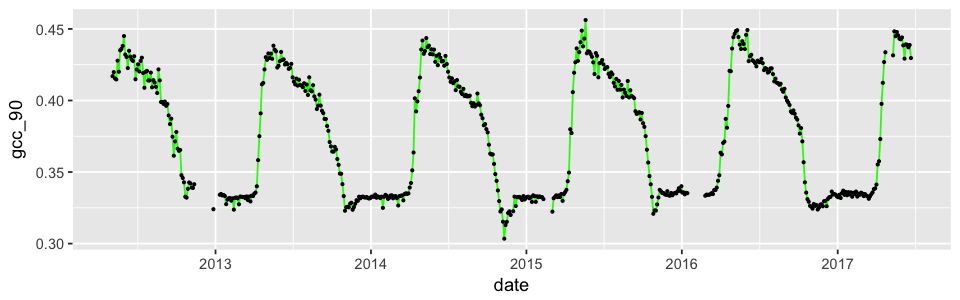

In [11]:
options(repr.plot.width = 8)
options(repr.plot.height = 2.5)
p = ggplot(df,aes(x=date,y=gcc_90)) + geom_line(col='green') + geom_point(size=.5, na.rm=TRUE)
p

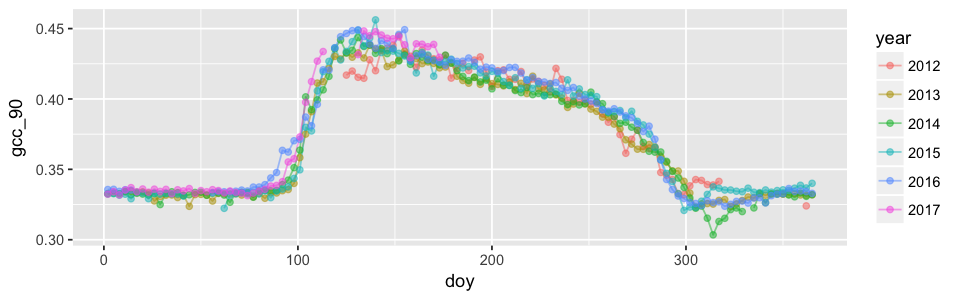

In [16]:
## plot gcc_90 vs doy for each year
options(repr.plot.width = 8)
options(repr.plot.height = 2.5)
df$year = factor(df$year,levels=seq(ystart,yend))
p = ggplot(df,aes(x=doy,y=gcc_90,col=year)) + geom_line(alpha=.5, na.rm=TRUE) 
p = p + geom_point(alpha=.5, na.rm=TRUE)
p